### Bianca Bucur

### Abilità informatiche e telematiche, a.a. 2022/23

### PARTE II

Si ripete la producedura della prima parte dell'ercizio per tre multipoli pari (0,2,e 4).



In [3]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

### 1. LETTURA DEI TRE MULTIPOLI DA UN SET DI DAT

In [4]:
Nbins=200 #Lunghezza vettore di dati
Nmeasures=10000 #10000
test=1 
measures_1=[]
measures_2=[]
measures_3=[]

for i in np.arange(Nmeasures)+1:
    fname= f'data/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'
    
    file=fits.open(fname)
    table=file[1].data.copy()
    measures_1.append(table['XI0'])
    measures_2.append(table['XI2'])
    measures_3.append(table['XI4'])
    if i==1:
        scale=table['SCALE']    
    del table
    file.close()
    
measures_1=np.asarray(measures_1)
measures_2=np.asarray(measures_2) 
measures_3=np.asarray(measures_3)

In [5]:
#I tre multipoli vengono memorizzati in tre array diversi e poi vengono concatenati

In [6]:
measures=np.concatenate((measures_1.transpose(),measures_2.transpose(),measures_3.transpose()))

In [7]:
measures.shape

(600, 10000)

### 2. CALCOLO DELLA MATRICE DI COVARIANZA NUMERICA CON NUMPY

In [8]:
covMatrix=np.cov(measures, bias=True)

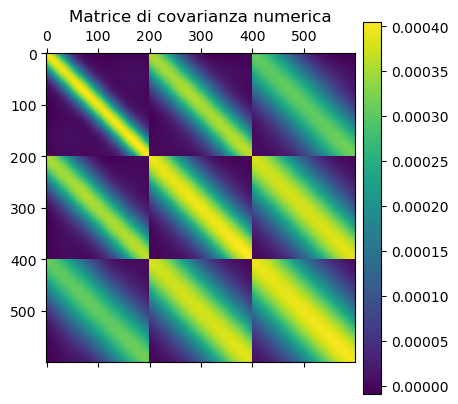

In [10]:
plt.matshow(covMatrix)


plt.title('Matrice di covarianza numerica') 
plt.colorbar(orientation="vertical", pad=0.02)

plt.savefig('3_1.png')
plt.show()

### 3. CALCOLO DELLA MATRICE DI COVARIANZA TEORICA

In [9]:
if test==1:
    sig = [0.02, 0.02, 0.02]
    h = [25, 50, 75]
elif test==2:
    sig = [0.02, 0.01, 0.005]
    h = [50, 50, 50]
else:
    sig = [0.02, 0.01, 0.005]
    h = [5, 5, 5]

###### COVARIANZA TEORICA DEI TRE MULTIPOLI CON LE CROSS-CORRELAZIONI

In [10]:
 def cov_teo(r1, r2, sig1, sig2, h1, h2):
    return sig1*sig2*(2.*h1*h2/(h1**2.+h2**2.))**0.5*np.exp(-(r1-r2)**2./(h1**2.+h2**2.))

In [22]:
Cov_teo=np.zeros((600,600),dtype=float)

for l1 in range(0,3):
    for l2 in range(0,3):
        for i in range(Nbins):
            for j in range(Nbins):
                Cov_teo[i+l1*Nbins][j+l2*Nbins]=cov_th(scale[i],scale[j],sig[l1],sig[l2],h[l1],h[l2])

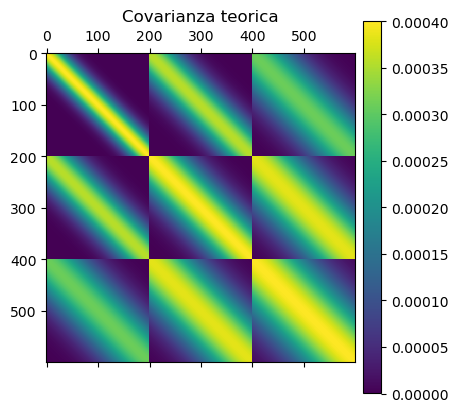

In [23]:
plt.matshow(Cov_teo)

plt.title('Covarianza teorica') 
plt.colorbar(orientation="vertical", pad=0.02)

plt.savefig('3_2.png')
plt.show()

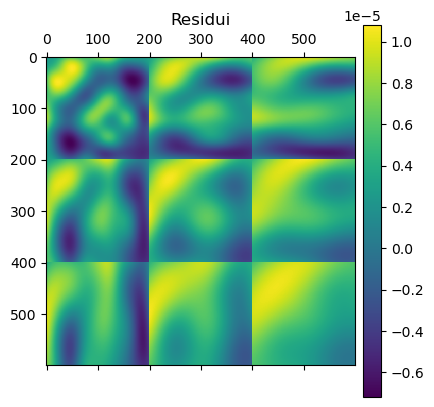

In [24]:
#Matrice dei resisui non normalizzata

plt.matshow(Cov_teo-covMatrix)


plt.title('Residui') 
plt.colorbar(orientation="vertical", pad=0.02)

plt.show()

### 4. CALCOLO DELLA MATRICE DI CORRELAZIONE

In [25]:
Corr=np.zeros((600,600),dtype=float) #Matrice di correlazione

for i in range(600):
    for j in range(600):
        Corr[i][j]=Cov_teo[i][j]/(Cov_teo[i][i]*Cov_teo[j][j])**0.5

##### DIFFERENZA QUADRATICA MEDIA DEI RESIDUI NORMALIZZATI

In [26]:
Res_norm=np.zeros((600,600),dtype=float) #Matrice dei residui

for i in range(600):
    for j in range(600):
        Res_norm[i][j]=(Cov_teo[i][j]-covMatrix[i][j])*((Nmeasures-1)/((1.+Res_norm[i][j])*Cov_teo[i][i]*Cov_teo[j][j]))**0.5 #gaussiana con media 0 e deviazione standard 1
Res_2=Res.reshape(600**2)

In [28]:
deviation=np.std(Res_2)

print(f" deviation of normalized residuals: {deviation}")

 deviation of normalized residuals: 0.8344348930732992


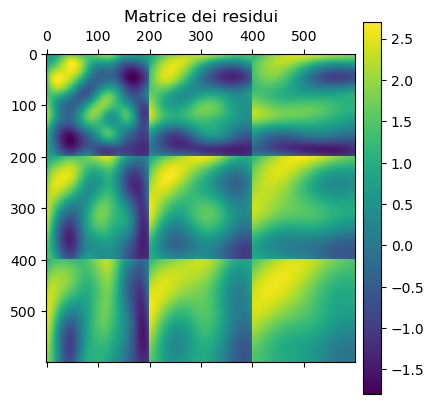

In [31]:
plt.matshow(Res_norm)

plt.title('Matrice dei residui') 
plt.colorbar( orientation="vertical", pad=0.02)

plt.savefig('3_3.png')
plt.show()